<img src="https://1000logos.net/wp-content/uploads/2019/12/Morgan-Stanley-emblem.jpg" width=450>

In [37]:
from selenium.webdriver.common.action_chains import ActionChains
from time import sleep
import selenium
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys

from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.by import By
from selenium.webdriver.support import expected_conditions as EC
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.service import Service
import json
from pprint import pprint
from tqdm import tqdm
import pandas as pd

In [38]:
def get_morganstanley_insights():
    
    service = Service(executable_path=ChromeDriverManager().install())
    driver = webdriver.Chrome(service=service)
    url = "https://www.morganstanley.com/im/en-us/institutional-investor/insights.html"
    driver.get(url)
    sleep(5)
    title_list = [i.text for i in driver.find_elements(By.CSS_SELECTOR,'.insightsIndexList')]
    link_list = [i.get_attribute('href') for i in driver.find_elements(By.CSS_SELECTOR,'.insightsIndexList')]
    date_list = [i.text for i in driver.find_elements(By.CSS_SELECTOR,'#latestInsights .pfdincoldBold span')]
    description_list = [i.text for i in driver.find_elements(By.CSS_SELECTOR,'.pressCenterText')]
    type_list = [i.text for i in driver.find_elements(By.CSS_SELECTOR,'#latestInsights .pressCenterType')]

    
    morganstanley_insights_list = []
    for title, link, date, description, type_, in zip(title_list, link_list, date_list, description_list, type_list):

        morganstanley_insights_dict = {

            'title': title,
            'date': date,
            'type_': type_,
            'description': description,
            'link': link,
        }
        morganstanley_insights_list.append(morganstanley_insights_dict)
    return morganstanley_insights_list

In [39]:
get_morganstanley_insights()

[WDM] - Downloading: 100%|████████████████████████████████████████████████████████| 6.68M/6.68M [00:04<00:00, 1.70MB/s]


[{'title': 'No Easy Fix ',
  'date': ' •  SEP 08, 2022',
  'type_': 'PATH',
  'description': 'The conundrum faced by central banks continues as they seek to control inflation, at the risk of pushing economies into recession. The Global Balanced Risk Control team discuss the investment implications and tactical allocations to navigate this complex environment.',
  'link': 'https://www.morganstanley.com/im/en-us/institutional-investor/insights/articles/no-easy-fix.html'},
 {'title': 'Market Alert with Andrew Slimmon ',
  'date': ' •  SEP 07, 2022',
  'type_': 'MARKET ALERT',
  'description': 'Andrew Slimmon, Head of the Applied Equity Advisors Team, offers a timely perspective on what is shaping the markets now as well as insights on investment opportunities and risk within global equities. Listen to his Market Alert.',
  'link': 'https://www.morganstanley.com/im/en-us/institutional-investor/insights/articles/market-alert-with-andrew-slimmon-20220907.html'},
 {'title': 'Is the Market Pri

In [26]:
driver = webdriver.Chrome()
url = "https://www.morganstanley.com/im/en-us/institutional-investor/insights.html"
driver.get(url)
sleep(5)
title_list = [i.text for i in driver.find_elements(By.CSS_SELECTOR,'.insightsIndexList')]
link_list = [i.get_attribute('href') for i in driver.find_elements(By.CSS_SELECTOR,'.insightsIndexList')]
date_list = [i.text for i in driver.find_elements(By.CSS_SELECTOR,'#latestInsights .pfdincoldBold span')]
description_list = [i.text for i in driver.find_elements(By.CSS_SELECTOR,'.pressCenterText')]
author_list = [i.text for i in driver.find_elements(By.CSS_SELECTOR,'.insightAuthorName')]
type_list = [i.text for i in driver.find_elements(By.CSS_SELECTOR,'#latestInsights .pressCenterType')]
input('exit?')
driver.quit()

exit?


In [31]:
morganstanley_insights_list = []
for title, link, date, description, author, type_, in zip(title_list, link_list, date_list, description_list, author_list, type_list):
    
    morganstanley_insights_dict = {
        
        'title': title,
        'author': author,
        'date': date,
        'type_': type_,
        'description': description,
        'link': link,
    }
    morganstanley_insights_list.append(morganstanley_insights_dict)

In [32]:
morganstanley_insights_df = pd.DataFrame(morganstanley_insights_list)

In [33]:
morganstanley_insights_df

,title,author,date,type_,description,link
0,Bear Market Rally?,"Andrew Harmstone, Manfred Hui","• AUG 09, 2022",PATH,Evidence suggest that the recent strength in d...,https://www.morganstanley.com/im/en-us/institu...
1,"Long Short Equity Strategies: ""Hedging"" Your B...",Eric Stampfel,"• AUG 08, 2022",RESILIENCE,Amid the market uncertainty caused by the COVI...,https://www.morganstanley.com/im/en-us/institu...
2,Are Conflicting Data Points Foreshadowing or F...,Jim Caron,"• AUG 08, 2022",CARON'S CORNER,"Jim Caron, Portfolio Manager and Chief Fixed I...",https://www.morganstanley.com/im/en-us/institu...
3,MSIM Forward for July 2022,⠀,"• AUG 04, 2022",INSIGHT ARTICLE,We believe times like these underscore the val...,https://www.morganstanley.com/im/en-us/institu...
4,Emerging India in a Multipolar World,"Jitania Kandhari, Amay Hattangadi","• AUG 02, 2022",TALES FROM THE EMERGING WORLD,"In India, there has been a recent change from ...",https://www.morganstanley.com/im/en-us/institu...
...,...,...,...,...,...,...
235,Blockchain,Counterpoint Global,"• MAY 15, 2018",EDGE,"Counterpoint Global examines Blockchain, the t...",https://www.morganstanley.com/im/en-us/institu...
236,EDGE: Autonomous Vehicles,Counterpoint Global,"• AUG 31, 2017",EDGE,Counterpoint Global researches autonomous vehi...,https://www.morganstanley.com/im/en-us/institu...
237,Machine Learning,Counterpoint Global,"• APR 30, 2017",EDGE,"Counterpoint Global examines machine learning,...",https://www.morganstanley.com/im/en-us/institu...
238,Case Study: CRISPR,Counterpoint Global,"• JAN 31, 2017",EDGE,Counterpoint Global analyzes clustered regular...,https://www.morganstanley.com/im/en-us/institu...


In [35]:
morganstanley_insights_df['link'].to_list()

['https://www.morganstanley.com/im/en-us/institutional-investor/insights/articles/bear-market-rally.html',
 'https://www.morganstanley.com/im/en-us/institutional-investor/insights/articles/long-short-equity-strategies-hedging-your-bets4.html',
 'https://www.morganstanley.com/im/en-us/institutional-investor/insights/articles/market-pulse-with-jim-caron-20220808.html',
 'https://www.morganstanley.com/im/en-us/institutional-investor/insights/articles/msim-forward-for-july-2022.html',
 'https://www.morganstanley.com/im/en-us/institutional-investor/insights/articles/emerging-india-in-a-multipolar-world.html',
 'https://www.morganstanley.com/im/en-us/institutional-investor/insights/articles/capex-reshapes-credit-profile-sectors-in-flux.html',
 'https://www.morganstanley.com/im/en-us/institutional-investor/insights/articles/market-pulse-with-jim-caron-20220801.html',
 'https://www.morganstanley.com/im/en-us/institutional-investor/insights/articles/energy-at-a-crossroads.html',
 'https://www.m

In [36]:
with open('morganstanley_insights_links.json', 'w') as f:
    json.dump(morganstanley_insights_df['link'].to_list(),f)

In [10]:
import requests
from bs4 import BeautifulSoup
import re

In [21]:
def text_cleaning(raw_text):
    text = re.sub('\s+',' ', raw_text).strip().lower()
    return text

In [28]:
import unidecode
# word = unidecode.unidecode(word)

In [29]:
def extract_content(link):
    # send request and create BeautifulSoup object
    response = requests.get(link)
    soup = BeautifulSoup(response.text)
    
    # Title
    title = soup.find('h1')
    if bool(title) is True:
        title = text_cleaning(title.text)
    else:
        title = 'N/A'
        
    # Date
    date = soup.find(class_='insightDateColor')
    if bool(date) is True:
        date = unidecode.unidecode(date.text)
    else:
        date = 'N/A'
    
    # Content
    content = soup.find('div',class_='insightsContent')
    if bool(content) is True:
        content = text_cleaning(content.text)
    else:
        content = 'N/A'
    
    
    morganstanley_dict = {
        "title": title,
        "date": date,
        "content": content,
    }
    
    return morganstanley_dict

In [30]:
extract_content('https://www.morganstanley.com/im/en-us/institutional-investor/insights/articles/advance-warming.html')

{'title': 'advance warming',
 'date': '  aC/  ',
 'content': 'the summer months in the northern hemisphere brought wildfires in the pacific northwest large enough to redden skies in new york, devastating floods in germany, heat waves in siberia, unprecedented fires in turkey, greece and italy, and once-in-a-millennium rains in china. scientists are evaluating the extent to which these events have a compounding effect, with global warming driving increased aridity and fires travelling upslope in areas previously too wet to burn, only to be followed by torrential downpours and devastation on faraway continents as warmer air carries more water. if the jet stream (the high-altitude winds circling the northern hemisphere) is being disrupted, the usefulness of past weather patterns for predicting future patterns and the probability of extreme climate events are called into question. the summer of fire and floods has also raised questions about whether disaster recovery plans are correctly ai

In [31]:
def extract_content(link):
    # Send request and create BeautifulSoup object
    response = requests.get(link)
    soup = BeautifulSoup(response.text)
    
    # Content
    content = soup.find('div',class_='insightsContent')
    if bool(content) is True:
        content = text_cleaning(content.text)
    else:
        content = 'N/A'

    
    return content

In [ ]:
"https://www.morganstanley.com/im/en-us/institutional-investor/insights.html"

In [50]:
class MorganStanleyInsights:
    
    def __init__(self,main_url):
        
        self.main_url = main_url
        
        service = Service(executable_path=ChromeDriverManager().install())
        self.driver = webdriver.Chrome(service=service)
    
    
    @staticmethod
    def text_cleaning(raw_text):
        text = re.sub('\s+',' ', raw_text).strip().lower()
        return text
    
    @staticmethod
    def extract_content(link):
        # Send request and create BeautifulSoup object
        response = requests.get(link)
        soup = BeautifulSoup(response.text)

        # Content
        content = soup.find('div',class_='insightsContent')
        if bool(content) is True:
            content = text_cleaning(content.text)
        else:
            content = 'N/A'


        return content
    
    
    def get_morganstanley_insights(self):
    
        self.driver.get(self.main_url)
        self.driver.implicitly_wait(5)
        
        title_list = [i.text for i in self.driver.find_elements(By.CSS_SELECTOR,'.insightsIndexList')]
        link_list = [i.get_attribute('href') for i in self.driver.find_elements(By.CSS_SELECTOR,'.insightsIndexList')]
        date_list = [i.text for i in self.driver.find_elements(By.CSS_SELECTOR,'#latestInsights .pfdincoldBold span')]
        description_list = [i.text for i in self.driver.find_elements(By.CSS_SELECTOR,'.pressCenterText')]
        tag_list = [i.text for i in self.driver.find_elements(By.CSS_SELECTOR,'#latestInsights .pressCenterType')]


        morganstanley_insights_list = []
        index = 1
        for title, link, date, description, tag, in tqdm(zip(title_list, link_list, date_list, description_list, tag_list)):

            morganstanley_insights_dict = {
                'index': index,
                'company': 'Morgan Stanley',
                'topic': 'Insight',
                'tag': tag,
                'section': '',
                'title': title,
                'date': date,
                'link': link,
                'abstract': description,
                'content': self.extract_content(link),
            }
            morganstanley_insights_list.append(morganstanley_insights_dict)
            index += 1
        
        return morganstanley_insights_list


# individual investor

In [41]:
obj = MorganStanleyInsights()
ms_list = obj.get_morganstanley_insights()

[WDM] - Downloading: 100%|████████████████████████████████████████████████████████| 6.68M/6.68M [00:03<00:00, 2.08MB/s]


In [44]:
df = pd.DataFrame(ms_list)

In [47]:
import seaborn as sns

<AxesSubplot:xlabel='count', ylabel='tag'>

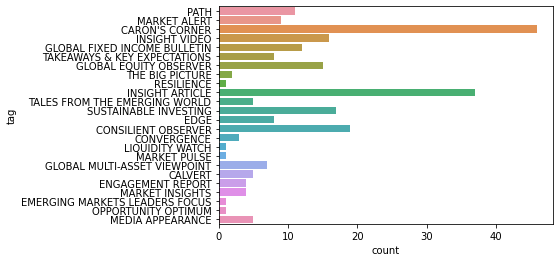

In [51]:
sns.countplot(y=df['tag'])